Accuracy: 0.9838565022421525

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



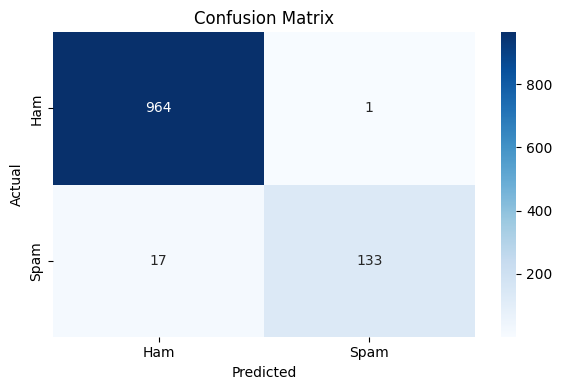

In [ ]:
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text.strip()

df['cleaned_message'] = df['message'].apply(clean_text)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_message'], df['label'], test_size=0.2, random_state=42
)

# TF-IDF
tfidf = TfidfVectorizer(max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train SVM
model = SVC(kernel='linear')
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 1️⃣ Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()



/tmp/ipython-input-631930143.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_words, palette='viridis')


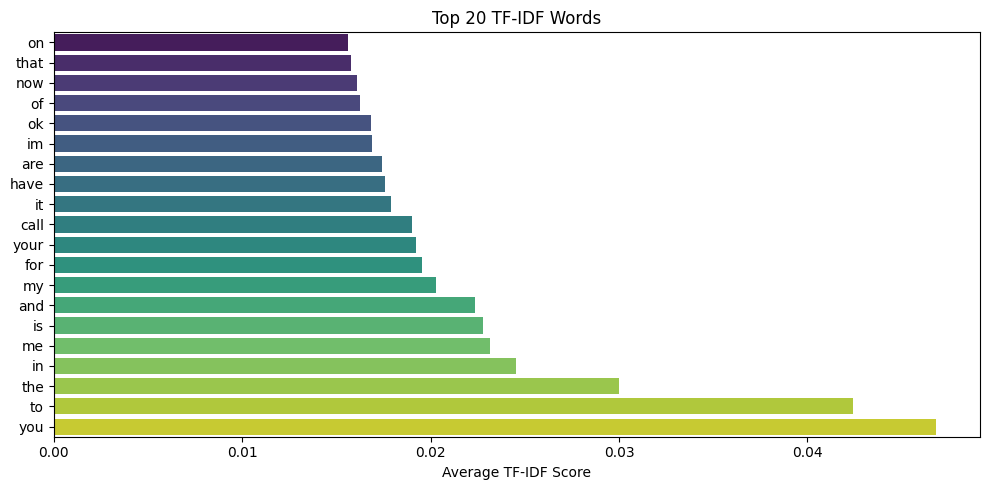

In [ ]:
# 2️⃣ TF-IDF: Top Words Plot
avg_tfidf_scores = np.asarray(X_train_tfidf.mean(axis=0)).ravel()
top_n = 20
top_indices = np.argsort(avg_tfidf_scores)[-top_n:]
top_words = [tfidf.get_feature_names_out()[i] for i in top_indices]
top_scores = avg_tfidf_scores[top_indices]

plt.figure(figsize=(10, 5))
sns.barplot(x=top_scores, y=top_words, palette='viridis')
plt.title("Top 20 TF-IDF Words")
plt.xlabel("Average TF-IDF Score")
plt.tight_layout()
plt.show()


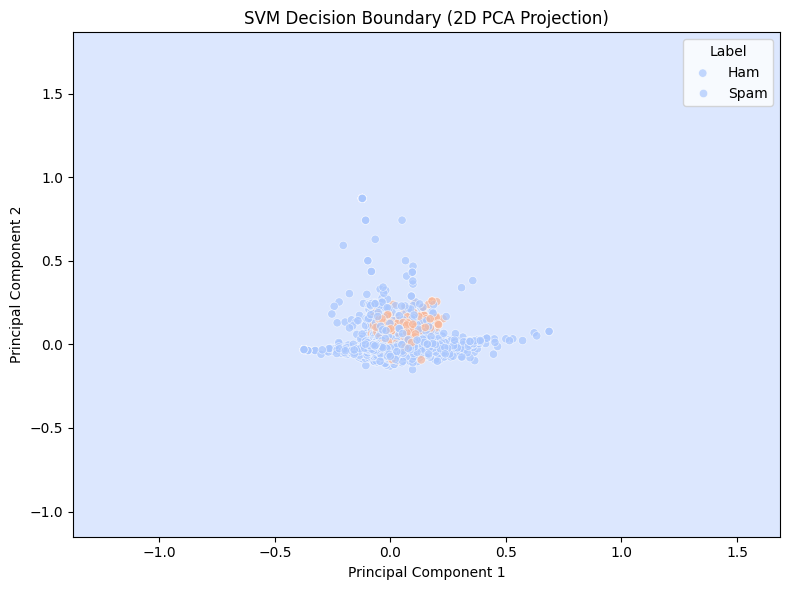

In [ ]:

# 3️⃣ SVM Decision Boundary (with PCA for 2D reduction)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())

model_2d = SVC(kernel='linear')
model_2d.fit(X_train_pca, y_train)

# Plotting decision boundary
h = .02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='coolwarm', alpha=0.7)
plt.title('SVM Decision Boundary (2D PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Label', labels=['Ham', 'Spam'])
plt.tight_layout()
plt.show()
